In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import math
import os

In [2]:
font = {'size'   : 15}
matplotlib.rc('font', **font)

In [3]:
metrics_folder = "simulation_metrics_a30_r5"

In [14]:
def merge_metrics(dcop_alg, graph_alg):
    csv_files = list(filter(lambda x: f'_{dcop_alg}_{graph_alg}.csv' in x, os.listdir(metrics_folder)))
    df_list = [pd.read_csv(os.path.join(metrics_folder, f)) for f in csv_files]
#     for df, f in zip(df_list, csv_files):
#         print(df.shape, f)
        
    columns = df_list[0].columns
    df_avg = pd.DataFrame({key: [0]*df_list[0].shape[0] for key in columns})
    df_std = pd.DataFrame({key: [0]*df_list[0].shape[0] for key in columns})
    
    for col in columns:
        arrays = []
        for df in df_list:
            arrays.append(df[col].values)
        df_avg[col] = np.average(arrays, axis=0)
        df_std[col] = np.std(arrays, axis=0)
    
    return df_avg, df_std

def plot_metric(digca_df_avg, ddfs_df_avg, dbfs_df_avg, digca_df_std, ddfs_df_std, dbfs_df_std, metric, 
                x_label, y_label, filename, dcop_alg, plot_num_nodes=False):
    sns.lineplot(x=digca_df_avg['timestep'], y=digca_df_avg[metric], label=f'{dcop_alg}-DIGCA')
    u_bound = (digca_df_avg[metric] + digca_df_std[metric]).values
    l_bound = (digca_df_avg[metric] - digca_df_std[metric]).values
    x_axis = digca_df_avg['timestep'].values
    plt.fill_between(x_axis, l_bound, u_bound, alpha=0.3)

    sns.lineplot(x=ddfs_df_avg['timestep'].values, y=ddfs_df_avg[metric], label=f'{dcop_alg}-DDFS')
    u_bound = (ddfs_df_avg[metric] + ddfs_df_std[metric]).values
    l_bound = (ddfs_df_avg[metric] - ddfs_df_std[metric]).values
    x_axis = ddfs_df_avg['timestep'].values
    plt.fill_between(x_axis, l_bound, u_bound, alpha=0.3)
    
    sns.lineplot(x=dbfs_df_avg['timestep'].values, y=dbfs_df_avg[metric], label=f'{dcop_alg}-DBFS')
    u_bound = (dbfs_df_avg[metric] + dbfs_df_std[metric]).values
    l_bound = (dbfs_df_avg[metric] - dbfs_df_std[metric]).values
    x_axis = dbfs_df_avg['timestep'].values
    plt.fill_between(x_axis, l_bound, u_bound, alpha=0.3)
    
    if plot_num_nodes:
        sns.lineplot(x=x_axis, y=df_cocoa_digca_avg['num nodes'], linestyle="dashed", label='Num of nodes')

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.tight_layout()
    plt.savefig(f'{metrics_folder}/{filename}.pdf')
    plt.show()


## CoCoA 

In [15]:
df_cocoa_digca_avg, df_cocoa_digca_std = merge_metrics('cocoa', 'digca')
df_cocoa_ddfs_avg, df_cocoa_ddfs_std = merge_metrics('cocoa', 'ddfs')
df_cocoa_dbfs_avg, df_cocoa_dbfs_std = merge_metrics('cocoa', 'dbfs')

In [16]:
df_cocoa_dbfs_avg.head()

,timestep,score,messages_count,edit distance,num components,num nodes,AGENT_REGISTRATION,ANNOUNCE_MSG,ANNOUNCE_RESPONSE_MSG,ANNOUNCE_IGNORED_MSG,...,DDFS_NEIGHBOR_DATA,DDFS_VALUE_MSG,DDFS_POSITION_MSG,DDFS_CHILD_MSG,DDFS_PSEUDO_CHILD_MSG,UtilMessage,ValueMessage,LEVEL_MESSAGE,ACK_MESSAGE,LEVEL_IGNORED_MESSAGE
0,0.0,0.3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,2.2,0.0,1.2,1.0,1.6,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,2.7,0.0,0.6,1.6,2.2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,1.2,0.0,2.2,0.2,0.4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,2.0,0.0,2.2,1.2,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


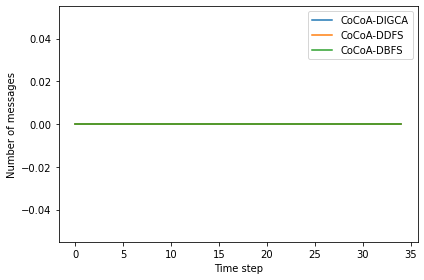

In [17]:
plot_metric(
    digca_df_avg=df_cocoa_digca_avg,
    digca_df_std=df_cocoa_digca_std,
    ddfs_df_avg=df_cocoa_ddfs_avg,
    ddfs_df_std=df_cocoa_ddfs_std,
    dbfs_df_avg=df_cocoa_dbfs_avg,
    dbfs_df_std=df_cocoa_dbfs_std,
    metric='messages_count',
    x_label='Time step',
    y_label='Number of messages',
    filename='CoCoA_num_messages',
    dcop_alg='CoCoA'
)

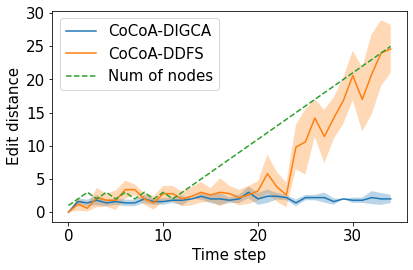

In [94]:
plot_metric(
    digca_df_avg=df_cocoa_digca_avg,
    digca_df_std=df_cocoa_digca_std,
    ddfs_df_avg=df_cocoa_ddfs_avg,
    ddfs_df_std=df_cocoa_ddfs_std,
    metric='edit distance',
    x_label='Time step',
    y_label='Edit distance',
    filename='CoCoA_edit_distance',
    plot_num_nodes=True,
    dcop_alg='CoCoA'
)

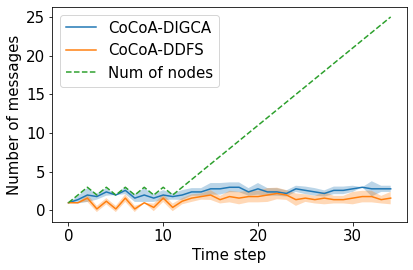

In [95]:
plot_metric(
    digca_df_avg=df_cocoa_digca_avg,
    digca_df_std=df_cocoa_digca_std,
    ddfs_df_avg=df_cocoa_ddfs_avg,
    ddfs_df_std=df_cocoa_ddfs_std,
    metric='num components',
    x_label='Time step',
    y_label='Number of messages',
    filename='CoCoA_num_components',
    plot_num_nodes=True,
    dcop_alg='CoCoA'
)

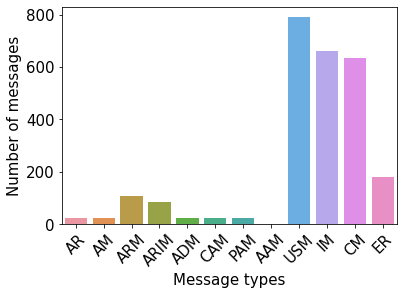

In [123]:
# DIGCA
bar_df = df_cocoa_digca_avg[['AGENT_REGISTRATION', 'ANNOUNCE_MSG', 'ANNOUNCE_RESPONSE_MSG', 
             'ANNOUNCE_IGNORED_MSG', 'ADD_ME', 'CHILD_ADDED', 'PARENT_ASSIGNED', 'ALREADY_ACTIVE', 
             'UpdateStateMsg', 'InquiryMessage', 'CostMessage', 'ExecutionRequest']]
x_ticks = ['AR', 'AM', 'ARM', 'ARIM', 'ADM', 'CAM', 'PAM', 'AAM', 'USM', 'IM', 'CM', 'ER']
bar_series = bar_df.iloc[-1]
bar_df = pd.DataFrame({
    'x':[
        'AgentRegistration',
        'Announce',
        'AnnounceResponse',
        'AnnounceResponseIgnored',
        'AddMe',
        'ChildAdded',
        'ParentAssigned',
        'AlreadyActive',
        'UpdateStateMsg', 
        'InquiryMessage', 
        'CostMessage',
        'ExecutionRequest',
    ], 
    'y':bar_series.array,
})
msgs_plot = sns.barplot(data=bar_df, x='x', y='y')
msgs_plot.set_xticks(range(len(x_ticks)))
msgs_plot.set_xticklabels(x_ticks)
for item in msgs_plot.get_xticklabels():
    item.set_rotation(45)
plt.xlabel('Message types')
plt.ylabel('Number of messages')
# plt.tight_layout()
plt.savefig('cocoa_digca_messages_bar_plot.pdf')
plt.show()

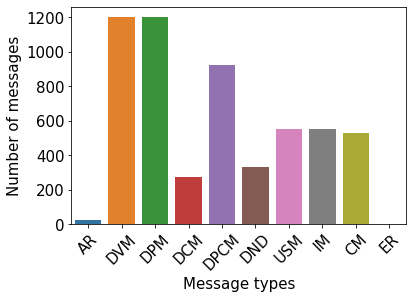

In [124]:
# DDFS
bar_df = df_cocoa_ddfs_avg[['AGENT_REGISTRATION', 'DDFS_VALUE_MSG',
        'DDFS_POSITION_MSG',
        'DDFS_CHILD_MSG',
        'DDFS_PSEUDO_CHILD_MSG',
        'DDFS_NEIGHBOR_DATA',
        'UpdateStateMsg', 
        'InquiryMessage', 
        'CostMessage','ExecutionRequest']]
x_ticks = ['AR', 'DVM', 'DPM', 'DCM', 'DPCM', 'DND', 'USM', 'IM', 'CM', 'ER']
bar_series = bar_df.iloc[-1]
bar_df = pd.DataFrame({
    'x':[
        'AGENT_REGISTRATION', 'DDFS_VALUE_MSG',
        'DDFS_POSITION_MSG',
        'DDFS_CHILD_MSG',
        'DDFS_PSEUDO_CHILD_MSG',
        'DDFS_NEIGHBOR_DATA',
        'UpdateStateMsg', 
        'InquiryMessage', 
        'CostMessage', 
        'ExecutionRequest',
    ], 
    'y':bar_series.array,
})
msgs_plot = sns.barplot(data=bar_df, x='x', y='y')
msgs_plot.set_xticks(range(len(x_ticks)))
msgs_plot.set_xticklabels(x_ticks)
for item in msgs_plot.get_xticklabels():
    item.set_rotation(45)
plt.xlabel('Message types')
plt.ylabel('Number of messages')
# plt.tight_layout()
plt.savefig('cocoa_ddfs_messages_bar_plot.pdf')
plt.show()

## DPOP

In [101]:
df_dpop_digca_avg, df_dpop_digca_std = merge_metrics('dpop', 'digca')
df_dpop_ddfs_avg, df_dpop_ddfs_std = merge_metrics('dpop', 'ddfs')

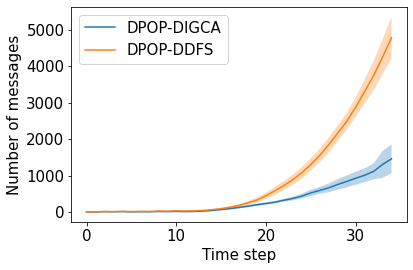

In [102]:
plot_metric(
    digca_df_avg=df_dpop_digca_avg,
    digca_df_std=df_dpop_digca_std,
    ddfs_df_avg=df_dpop_ddfs_avg,
    ddfs_df_std=df_dpop_ddfs_std,
    metric='messages_count',
    x_label='Time step',
    y_label='Number of messages',
    filename='DPOP_num_messages',
    dcop_alg='DPOP'
)

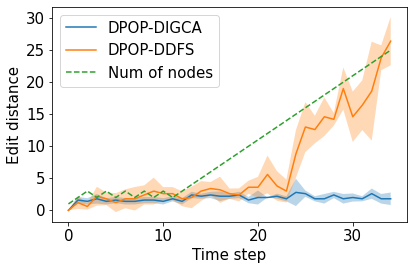

In [103]:
plot_metric(
    digca_df_avg=df_dpop_digca_avg,
    digca_df_std=df_dpop_digca_std,
    ddfs_df_avg=df_dpop_ddfs_avg,
    ddfs_df_std=df_dpop_ddfs_std,
    metric='edit distance',
    x_label='Time step',
    y_label='Edit distance',
    filename='DPOP_edit_distance',
    plot_num_nodes=True,
    dcop_alg='DPOP'
)

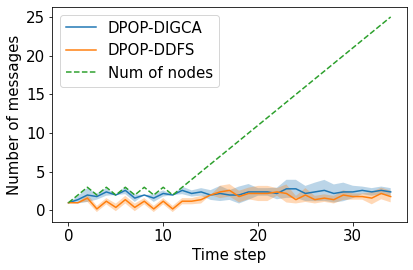

In [104]:
plot_metric(
    digca_df_avg=df_dpop_digca_avg,
    digca_df_std=df_dpop_digca_std,
    ddfs_df_avg=df_dpop_ddfs_avg,
    ddfs_df_std=df_dpop_ddfs_std,
    metric='num components',
    x_label='Time step',
    y_label='Number of messages',
    filename='DPOP_num_components',
    plot_num_nodes=True,
    dcop_alg='DPOP'
)

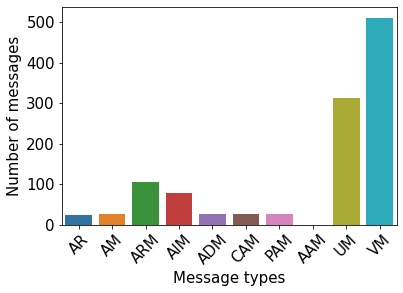

In [121]:
# DIGCA
bar_df = df_dpop_digca_avg[['AGENT_REGISTRATION', 'ANNOUNCE_MSG', 'ANNOUNCE_RESPONSE_MSG', 
             'ANNOUNCE_IGNORED_MSG', 'ADD_ME', 'CHILD_ADDED', 'PARENT_ASSIGNED', 'ALREADY_ACTIVE', 
             'UtilMessage', 'ValueMessage']]
x_ticks = ['AR', 'AM', 'ARM', 'AIM', 'ADM', 'CAM', 'PAM', 'AAM', 'UM', 'VM']
bar_series = bar_df.iloc[-1]
bar_df = pd.DataFrame({
    'x':[
        'AgentRegistration',
        'Announce',
        'AnnounceResponse',
        'AnnounceResponseIgnored',
        'AddMe',
        'ChildAdded',
        'ParentAssigned',
        'AlreadyActive',
        'UtilMessage', 
        'ValueMessage',
    ], 
    'y':bar_series.array,
})
msgs_plot = sns.barplot(data=bar_df, x='x', y='y')
msgs_plot.set_xticklabels(x_ticks)
for item in msgs_plot.get_xticklabels():
    item.set_rotation(45)
plt.xlabel('Message types')
plt.ylabel('Number of messages')
# plt.tight_layout()
plt.savefig('dpop_digca_messages_bar_plot.pdf')
plt.show()

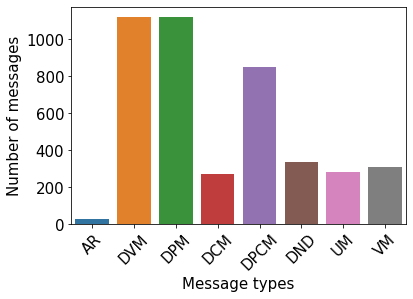

In [126]:
# DDFS
bar_df = df_dpop_ddfs_avg[['AGENT_REGISTRATION', 'DDFS_VALUE_MSG',
        'DDFS_POSITION_MSG',
        'DDFS_CHILD_MSG',
        'DDFS_PSEUDO_CHILD_MSG',
        'DDFS_NEIGHBOR_DATA',
        'UtilMessage', 'ValueMessage']]
x_ticks = ['AR', 'DVM', 'DPM', 'DCM', 'DPCM', 'DND', 'UM', 'VM']
bar_series = bar_df.iloc[-1]
bar_df = pd.DataFrame({
    'x':[
        'AGENT_REGISTRATION', 'DDFS_VALUE_MSG',
        'DDFS_POSITION_MSG',
        'DDFS_CHILD_MSG',
        'DDFS_PSEUDO_CHILD_MSG',
        'DDFS_NEIGHBOR_DATA',
        'UtilMessage', 'ValueMessage'
    ], 
    'y':bar_series.array,
})
msgs_plot = sns.barplot(data=bar_df, x='x', y='y')
msgs_plot.set_xticklabels(x_ticks)
for item in msgs_plot.get_xticklabels():
    item.set_rotation(45)
plt.xlabel('Message types')
plt.ylabel('Number of messages')
# plt.tight_layout()
plt.savefig('dpop_ddfs_messages_bar_plot.pdf')
plt.show()

## Graphs

In [109]:
def draw_charts(files, label, graph_dir):
    ncols=3
    fig, axes = plt.subplots(nrows=math.ceil(len(files)/ncols), ncols=ncols, figsize=(20, 15))
    plt.subplots_adjust(hspace=1., wspace=1.)
    fig.suptitle('Simulation graphs per time step')
    
    for f, ax in zip(files, axes.flatten()):
        ax.set_title('time step ' + f.split('.')[0])
        g=nx.read_adjlist(os.path.join('graphs-' + graph_dir, f))
        nx.draw_networkx(g, with_labels=True, ax=ax, font_size=13, font_color="whitesmoke", node_size=1000)
    plt.tight_layout()
    plt.plot()
    fig.savefig(label + '_graphs.pdf')

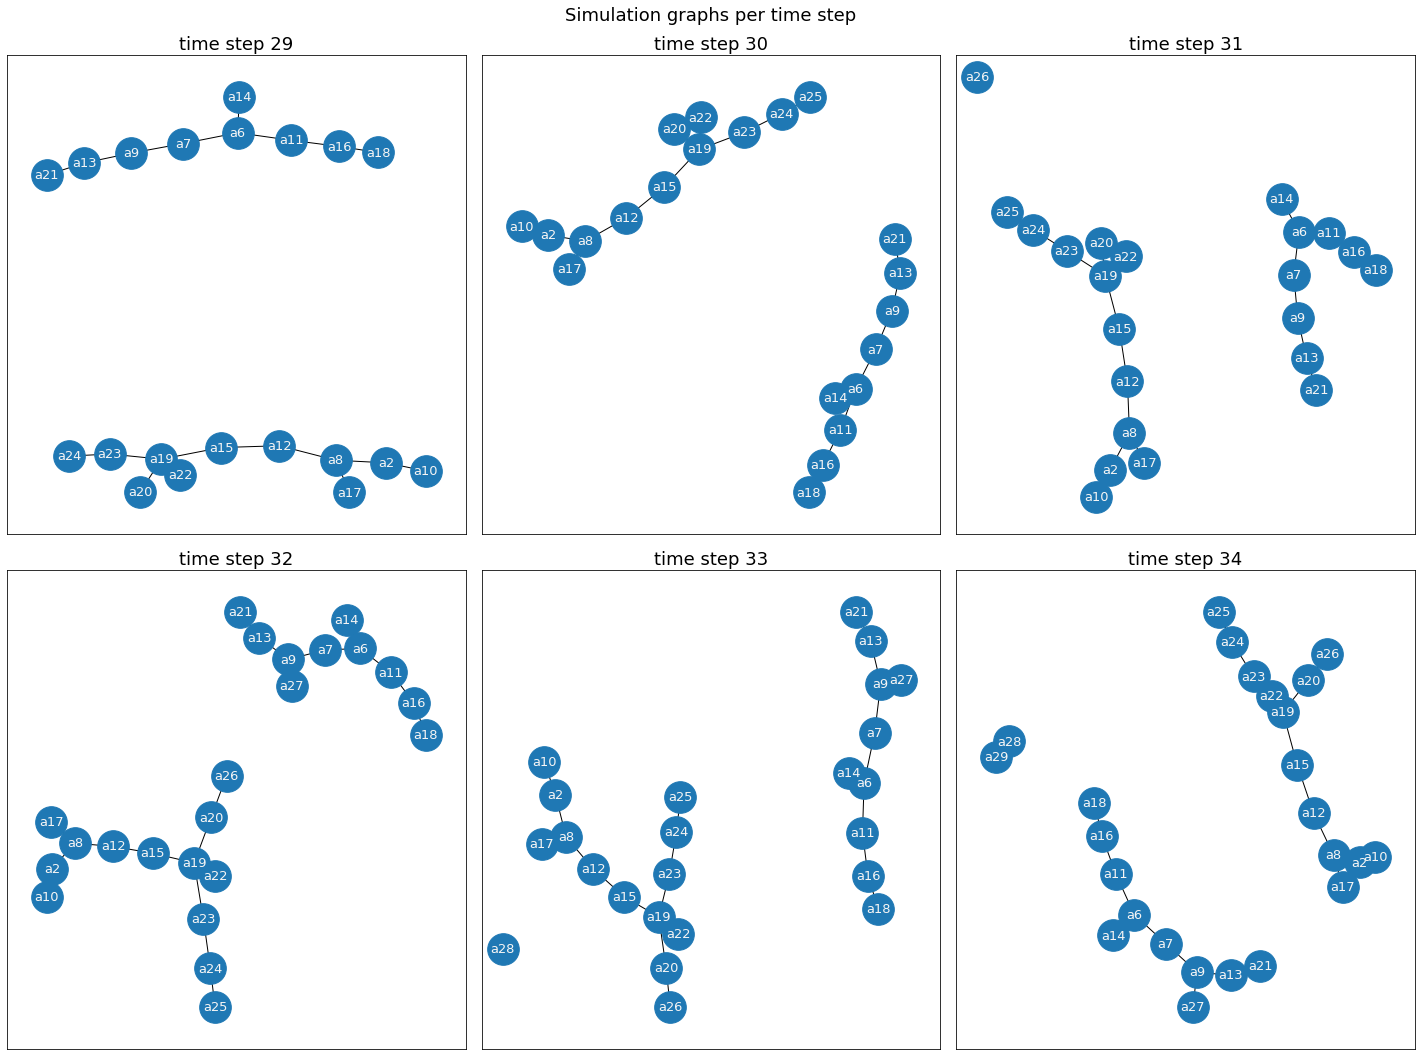

In [110]:
gdir='0_cocoa_digca'
gfiles = os.listdir('graphs-' + gdir)
gfiles = sorted(gfiles, key=lambda x: int(x.split('.')[0]))
draw_charts(gfiles[-6:], 'digca', graph_dir=gdir)

In [111]:
graphs = []
for gfile in gfiles[-6:]:
    g = nx.read_adjlist(os.path.join('graphs-3_dpop_digca', gfile))
    graphs.append(g)

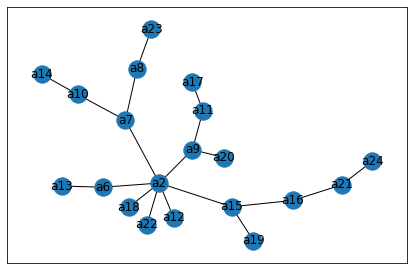

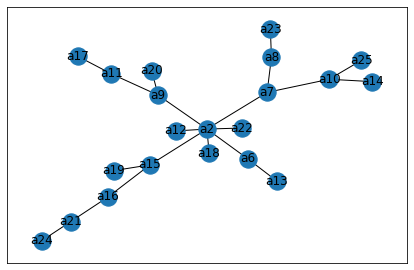

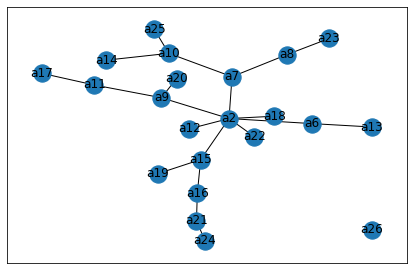

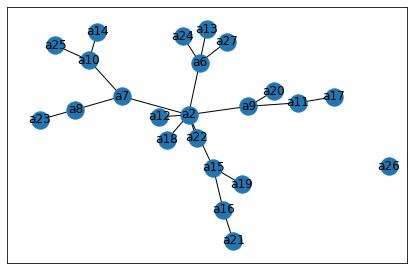

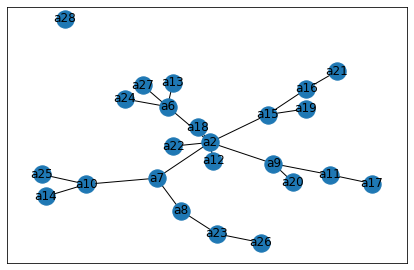

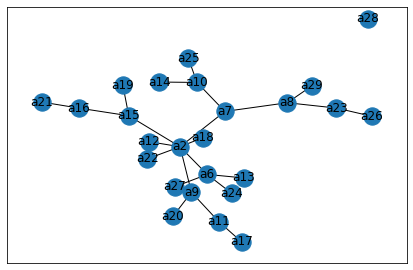

In [112]:
for i, g in enumerate(graphs):
    pos=nx.spring_layout(g, scale=3, k=.3, iterations=50)
#     plt.figure(figsize=(8,8))
    nx.draw_networkx(g, pos)
#     plt.xlim(-0.05,1.05)
#     plt.ylim(-0.05,1.05)
    plt.tight_layout()
    plt.savefig(f'hierarchy_{i+1}.pdf')
    plt.show()

##  LaTeX

In [19]:
g=graphs[0]

In [62]:
pos=nx.spring_layout(g, scale=3, k=.2, iterations=20)
print(nx.to_latex_raw(g, pos))

  \begin{tikzpicture}
      \draw
        (2.139, -1.267) node (a2){a2}
        (2.026, -0.17) node (a8){a8}
        (2.03, -2.177) node (a10){a10}
        (-2.378, 1.255) node (a6){a6}
        (-1.999, 1.929) node (a7){a7}
        (-1.494, 1.411) node (a11){a11}
        (-2.795, 0.504) node (a14){a14}
        (-1.12, 1.921) node (a9){a9}
        (2.314, -0.429) node (a12){a12}
        (1.976, 0.706) node (a17){a17}
        (-0.693, 1.35) node (a13){a13}
        (-0.624, 2.075) node (a16){a16}
        (1.409, -0.852) node (a15){a15}
        (-0.643, 0.707) node (a21){a21}
        (0.453, -1.41) node (a19){a19}
        (-0.452, 3.0) node (a18){a18}
        (0.972, -1.625) node (a20){a20}
        (0.32, -2.125) node (a22){a22}
        (-0.431, -2.077) node (a23){a23}
        (-1.01, -2.724) node (a24){a24};
      \begin{scope}[-]
        \draw (a2) to (a8);
        \draw (a2) to (a10);
        \draw (a8) to (a12);
        \draw (a8) to (a17);
        \draw (a6) to (a7);
        \draw (a6